## Detecting Labels, Faces, and Landmarks in Images with the Cloud Vision API

### Overview
The Cloud Vision API lets you understand the content of an image by encapsulating powerful machine learning models in a simple REST API.

In this NoteBook , we send images to the Vision API and see it detect objects, faces, and landmarks.

### Ojectives
In this Notebook, you learn how to perform the following tasks:

- Create a Vision API request and call the API with curl.

- Use the label, face, and landmark detection methods of the vision API

### Activate Cloud Shell

Cloud Shell is a virtual machine that contains development tools. It offers a persistent 5-GB home directory and runs on Google Cloud. Cloud Shell provides command-line access to your Google Cloud resources. gcloud is the command-line tool for Google Cloud. It comes pre-installed on Cloud Shell and supports tab completion.

1. Click the Activate Cloud Shell button  at the top right of the console.

2. Click Continue.
It takes a few moments to provision and connect to the environment. When you are connected, you are also authenticated, and the project is set to your PROJECT_ID.


    gcloud auth list
    
    gcloud config list project
    
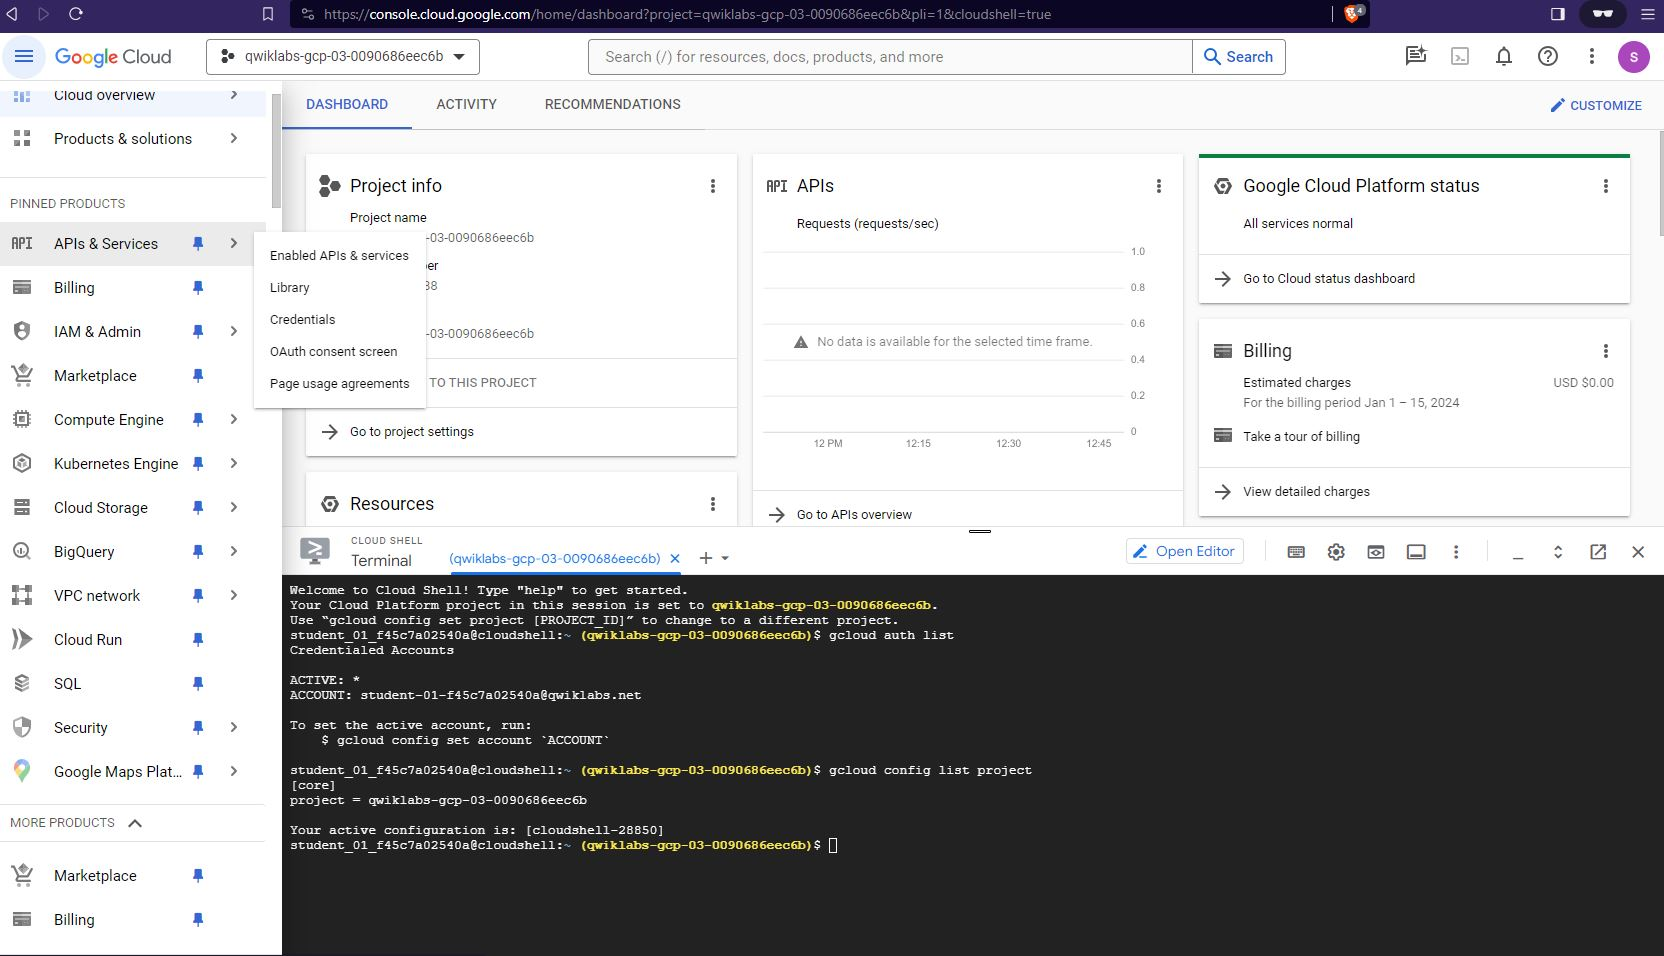

    
>Note: Full documentation of gcloud is available in the [gcloud CLI overview guide](https://cloud.google.com/sdk/gcloud).

### Task 1. Create an API Key
Since you are using curl to send a request to the Vision API, you need to generate an API key to pass in your request URL.

1. To create an API key, navigate to APIs & Services > Credentials in your Cloud console:

2. Click CREATE CREDENTIALS and select API key.

3. Next, copy the key you just generated and click CLOSE.

Now save it to an environment variable to avoid having to insert the value of your API key in each request.

Run the following in Cloud Shell, replacing <YOUR_API_KEY> with the key you just copied:

    export API_KEY=<YOUR_API_KEY>

### Task 2. Upload an Image to a Cloud Storage bucket

#### Create a Cloud Storage bucket

There are two ways to send an image to the Vision API for image detection: by sending the API a base64 encoded image string, or passing it the URL of a file stored in Cloud Storage. You use a Cloud Storage URL. The first step is to create a Cloud Storage bucket to store your images.

1. Navigate to Navigation menu > Cloud Storage in the Cloud console for your project, then click CREATE BUCKET.

2. Set a unique name (use your project ID because it is unique) and then choose a regional bucket (For example set the region to us-central1).

3. After naming your bucket, click Choose how to control access to objects. Uncheck Enforce public access prevention on this bucket and select the Fine-grained circle.

4. All other settings for your bucket can remain as the default setting. Click CREATE.

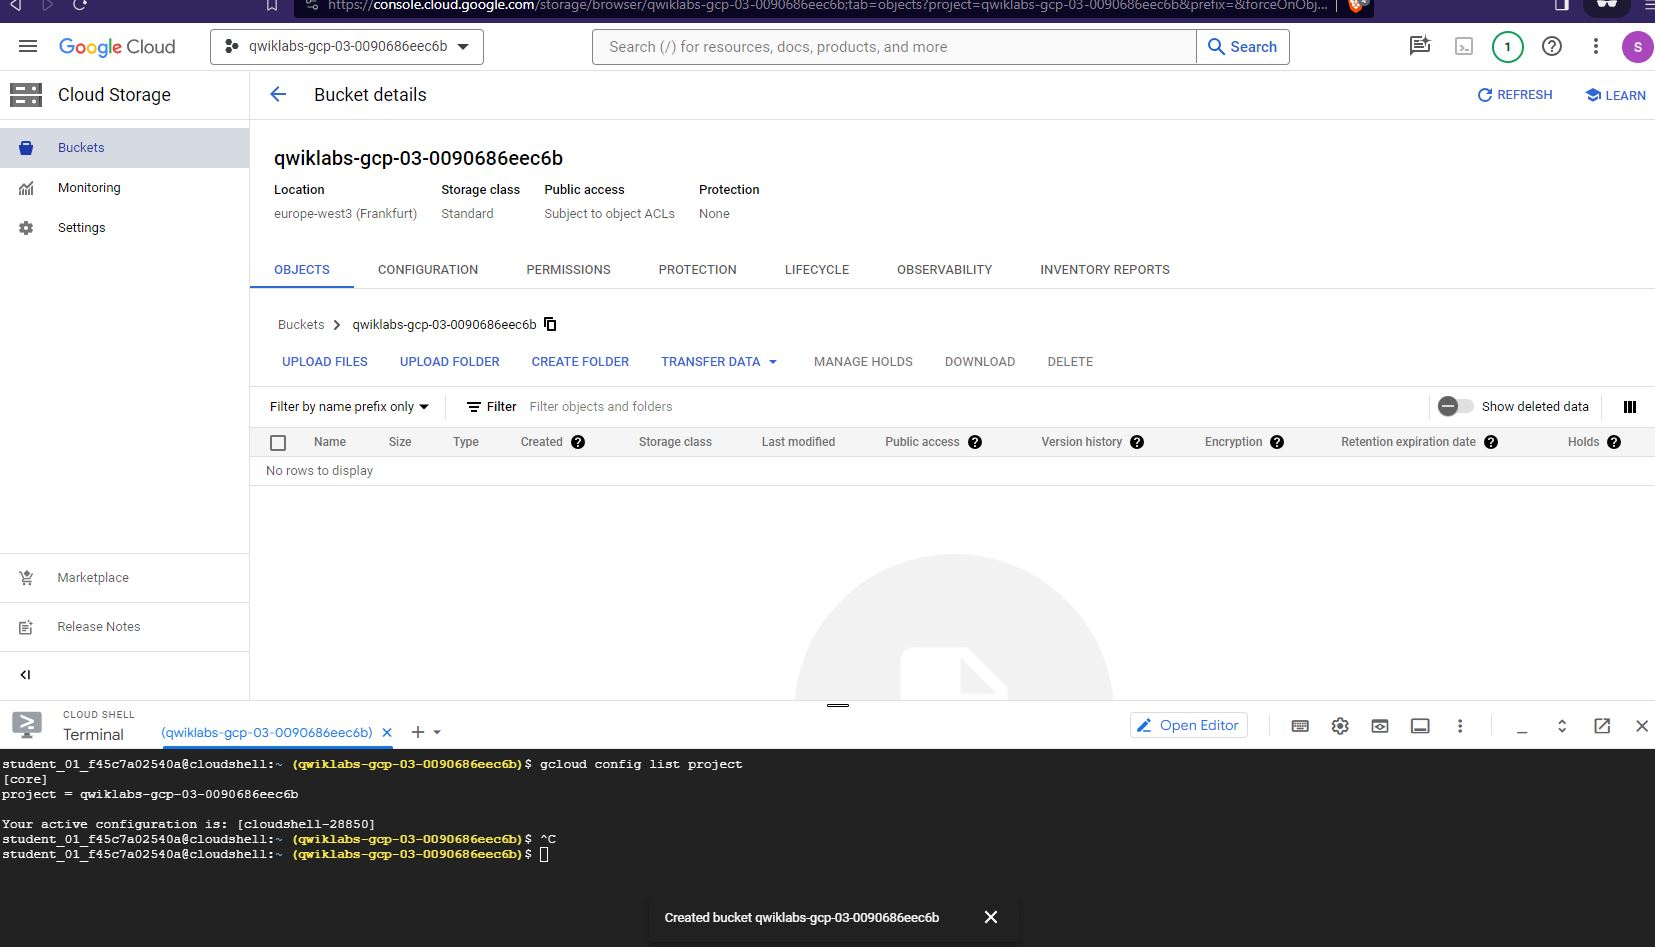

#### Upload an image to your bucket

1. Open the following image of donuts, https://cdn.qwiklabs.com/V4PmEUI7yXdKpytLNRqwV%2ByGHqym%2BfhdktVi8nj4pPs%3D Right click on the image then click Save image as and save it to your computer as donuts.png.

2. Go to the bucket you just created and click UPLOAD FILES. Then select donuts.png.

You should see the file in your bucket.

3. Now you need to make this image publicly available. Click on the 3 dots for your image and select Edit access.

4. Click Add entry then enter the following:

- Entity: Public
- Name: allUsers
- Access: Reader

5. Then click SAVE.

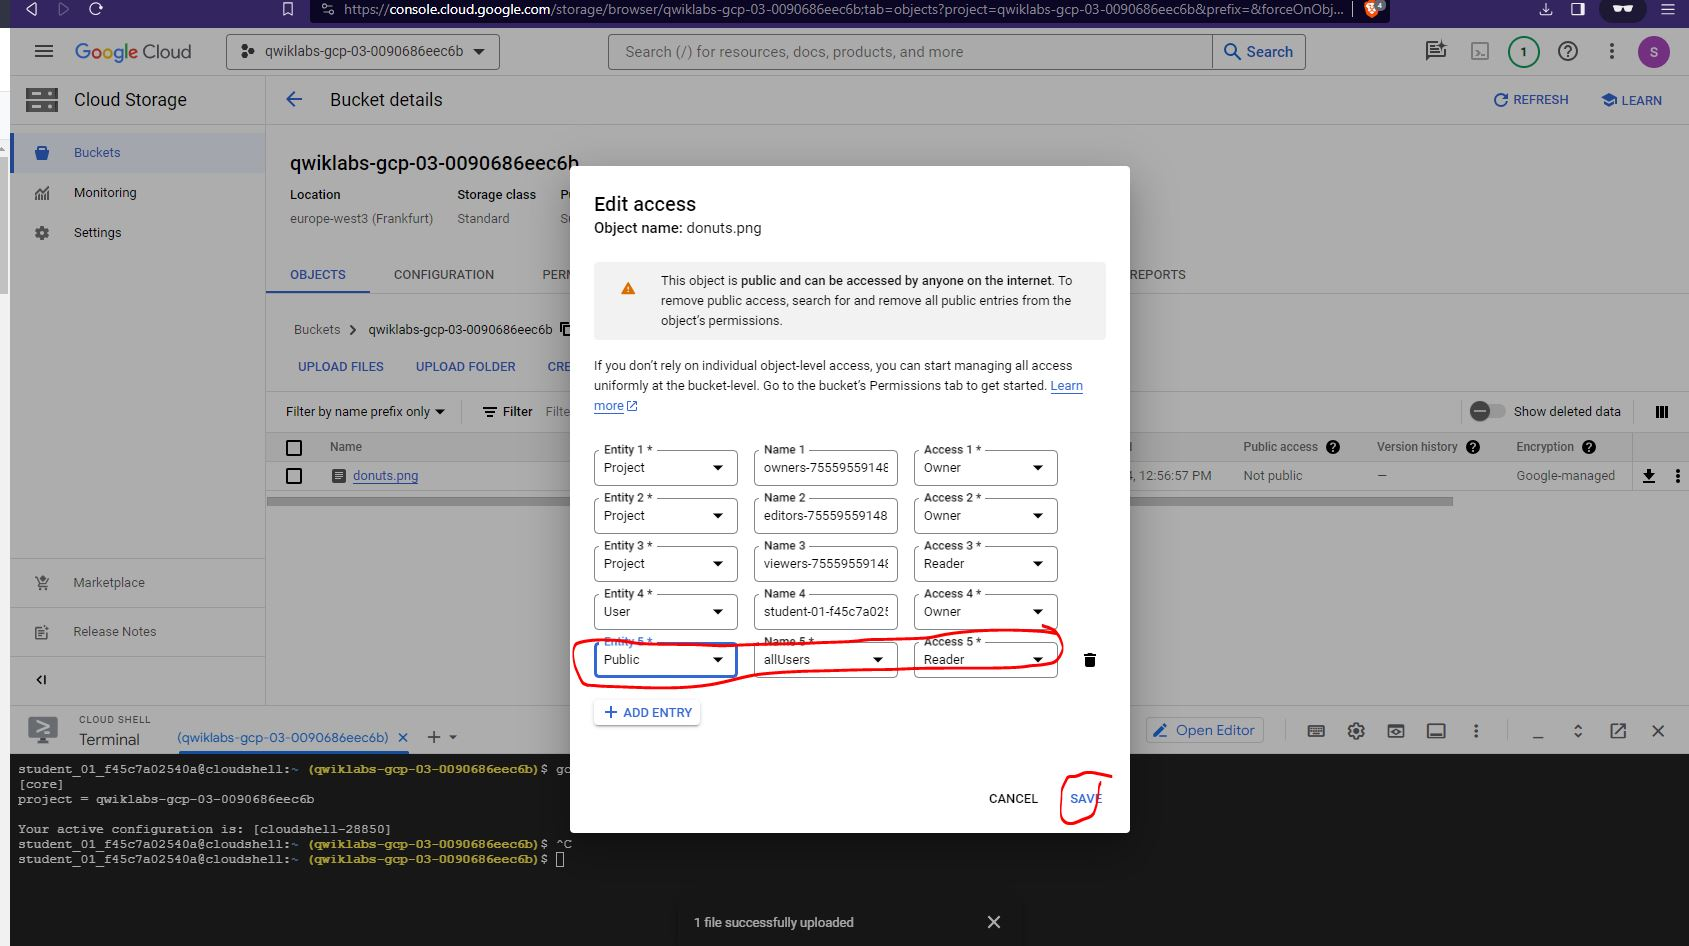

Now that you have the file in your bucket, you're ready to create a Vision API request, passing it the URL of this donuts picture.

### Task 3. Create your Vision API request

Now you create a `request.json` file in the Cloud Shell environment.

Create a JSON request file for submitting the base64 encoded form for processing:

>Note
Replace `my-bucket-name` with the name of your storage bucket.

In [ ]:
echo '
{
  "requests": [
      {
        "image": {
          "source": {
              "gcsImageUri": "gs://my-bucket-name/donuts.png"
          }
        },
        "features": [
          {
            "type": "LABEL_DETECTION",
            "maxResults": 10
          }
        ]
      }
  ]
}
' > request.json

### Task 4. Label Detection

The first Cloud Vision API feature you try out is label detection. This method returns a list of labels (words) of what's in your image. Call the Vision API with curl:

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json  https://vision.googleapis.com/v1/images:annotate?key=${API_KEY}

Your response should look something like the following:

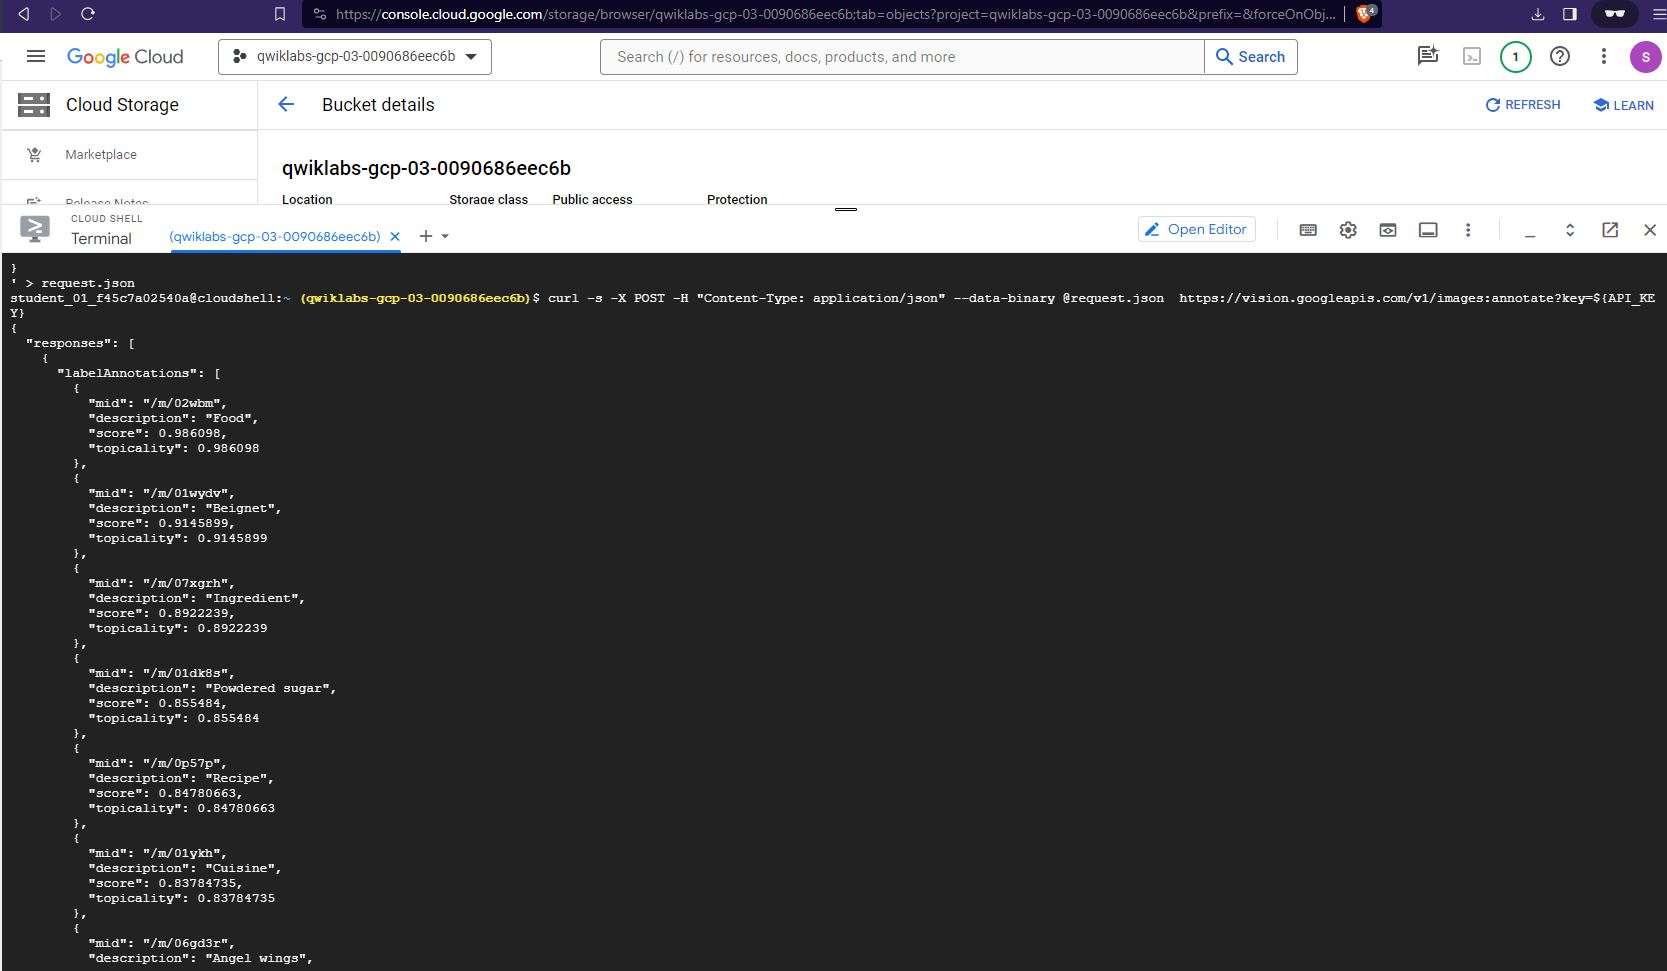


The API was able to identify the specific type of donuts these are, powdered sugar. Cool! For each label the Vision API found, it returns a:

- `description` with the name of the item.

- `score`, a number from 0 - 1 indicating how confident it is that the description matches what's in the image.

- `mid` value that maps to the item's mid in Google's [Knowledge Graph](https://www.google.com/intl/bn/insidesearch/features/search/knowledge.html). You can use the mid when calling the [Knowledge Graph API](https://developers.google.com/knowledge-graph/) to get more information on the item.

### Task 5. Web Detection

In addition to getting labels on what's in your image, the Vision API can also search the Internet for additional details on your image. Through the API's webDetection method, you get a lot of interesting data back:

- A list of entities found in your image, based on content from pages with similar images
- URLs of exact and partial matching images found across the web, along with the URLs of those pages
- URLs of similar images, like doing a reverse image search

To try out web detection, use the same image of beignets and change one line in the request.json file (you can also venture out into the unknown and use an entirely different image).

1. Under the features list, change type from LABEL_DETECTION to WEB_DETECTION. The request.json should now look like this:

In [ ]:
{
  "requests": [
      {
        "image": {
          "source": {
              "gcsImageUri": "gs://my-bucket-name/donuts.png"
          }
        },
        "features": [
          {
            "type": "WEB_DETECTION",
            "maxResults": 10
          }
        ]
      }
  ]
}

2. Save the file.

To send it to the Vision API, use the same curl command as before (just press the up arrow in Cloud Shell):

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json  https://vision.googleapis.com/v1/images:annotate?key=${API_KEY}

Dive into the response, starting with webEntities. Here are some of the entities this image returned:

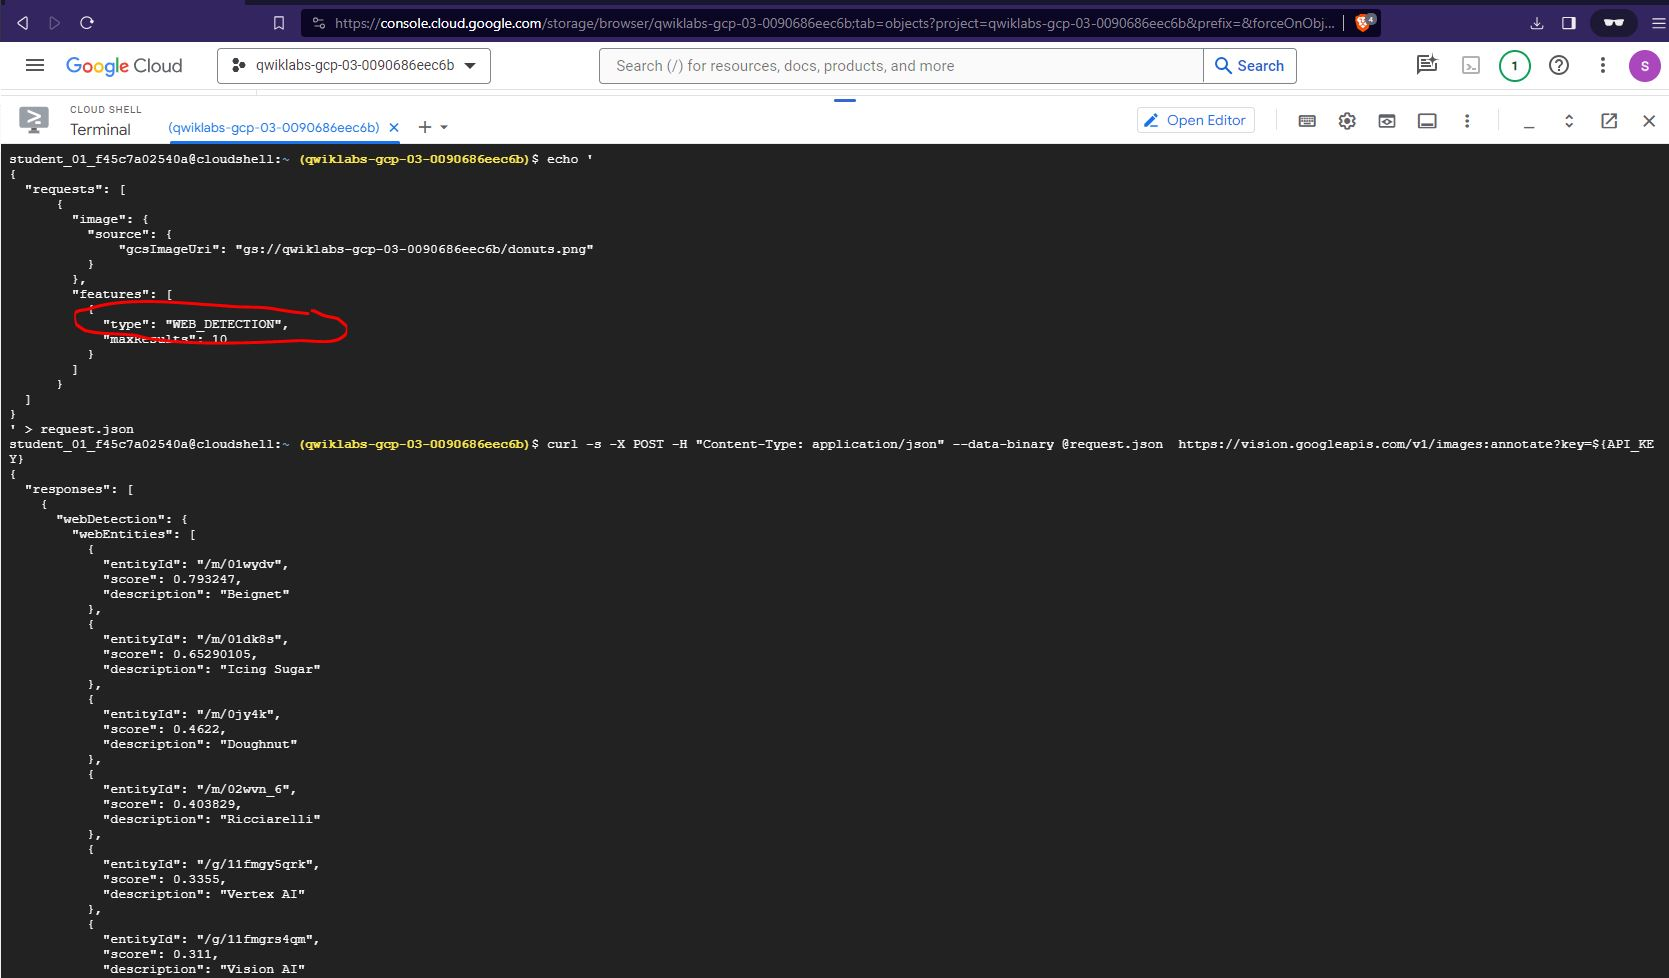

This image has been used in many presentations on Cloud ML APIs, which is why the API found the entities "Machine learning" and "Cloud Vision".

If you inpsect the URLs under fullMatchingImages, partialMatchingImages, and pagesWithMatchingImages, you notice that many of the URLs point to this lab site (super meta!).

Say you wanted to find other images of beignets, but not the exact same images. That's where the visuallySimilarImages part of the API response comes in handy. Here are a few of the visually similar images it found:

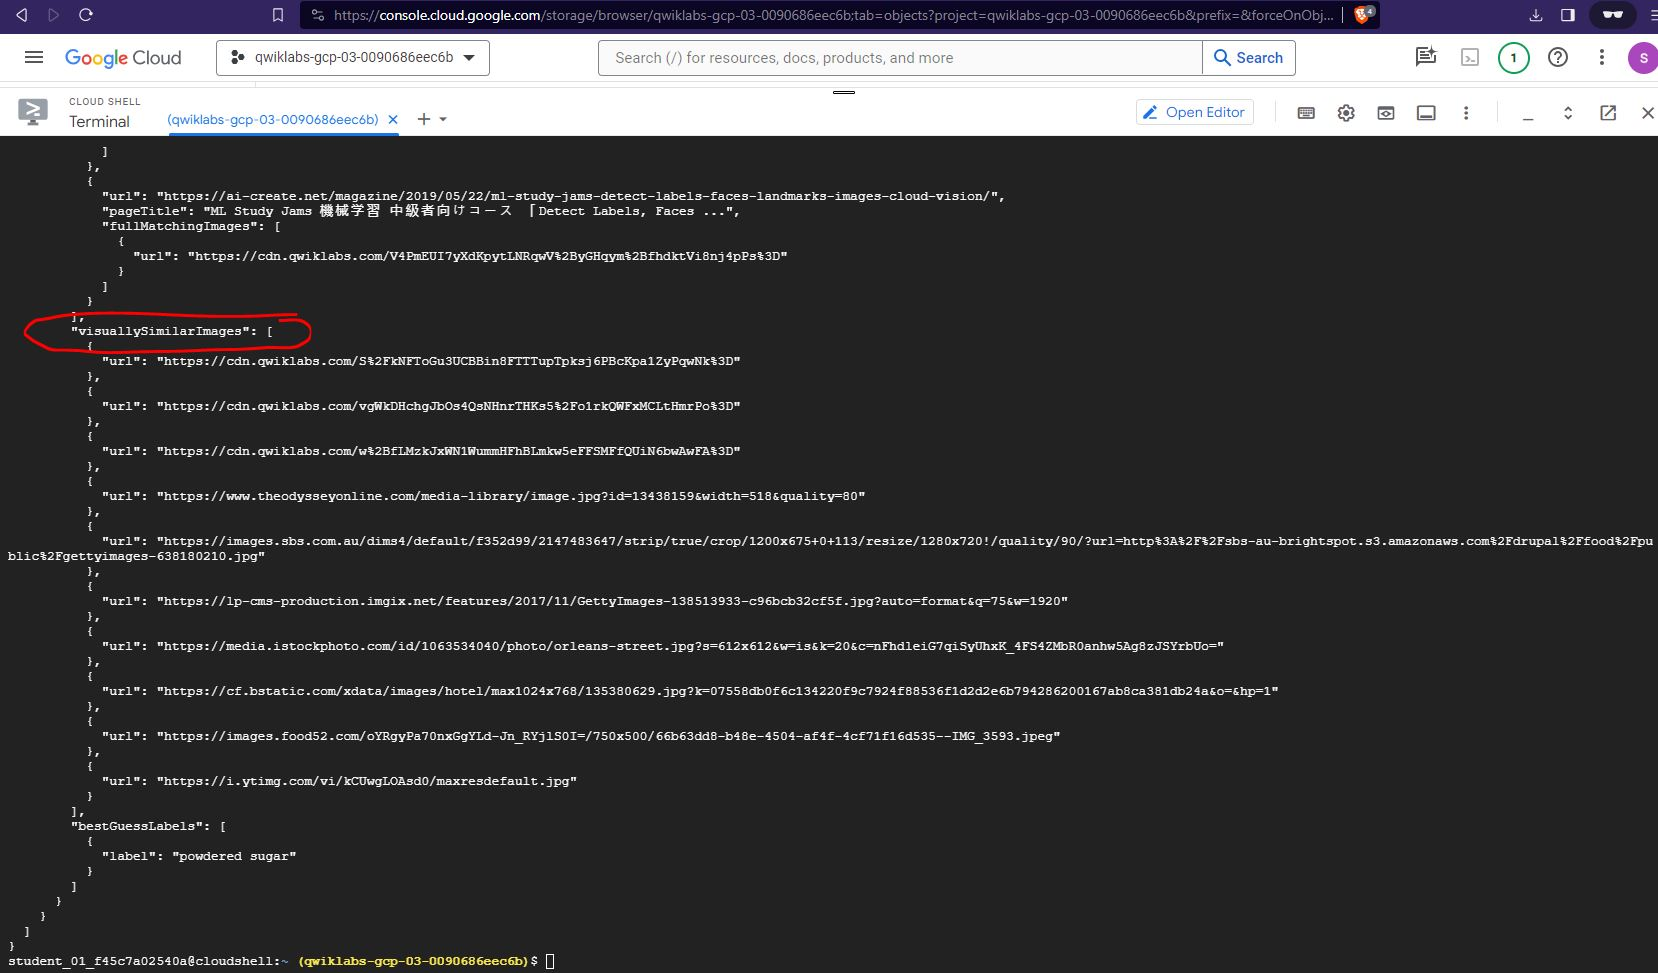

You can navigate to those URLs to see the similar images. This is similar to searching by an image on Google Images. With Cloud Vision you can access this functionality with an easy to use REST API and integrate it into your applications.

### Task 6. Face Detection

Next explore the face detection methods of the Vision API.

- The face detection method returns data on faces found in an image, including the emotions of the faces and their location in the image.

#### Upload a new image

To use this method, you upload a new image with faces to the Cloud Storage bucket.

1. Open the following image, https://cdn.qwiklabs.com/5%2FxwpTRxehGuIRhCz3exglbWOzueKIPikyYj0Rx82L0%3D right click then click Save image as and save it to your computer as selfie.png.

2. Now upload it to your Cloud Storage bucket the same way you did before, and make it public.

#### Update request file

Next, update your request.json file with the following, which includes the URL of the new image, and uses face and landmark detection instead of label detection. Be sure to replace my-bucket-name with the name of your Cloud Storage bucket:

In [ ]:
{
  "requests": [
      {
        "image": {
          "source": {
              "gcsImageUri": "gs://my-bucket-name/selfie.png"
          }
        },
        "features": [
          {
            "type": "FACE_DETECTION"
          },
          {
            "type": "LANDMARK_DETECTION"
          }
        ]
      }
  ]
}

2. Save the file.

### Task 7. Call the Vision API and parse the response

Now you're ready to call the Vision API using the same curl command you used above:

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json  https://vision.googleapis.com/v1/images:annotate?key=${API_KEY}

Take a look at the faceAnnotations object in the response. You notice the API returns an object for each face found in the image - in this case, three. Here's a clipped version of the response:

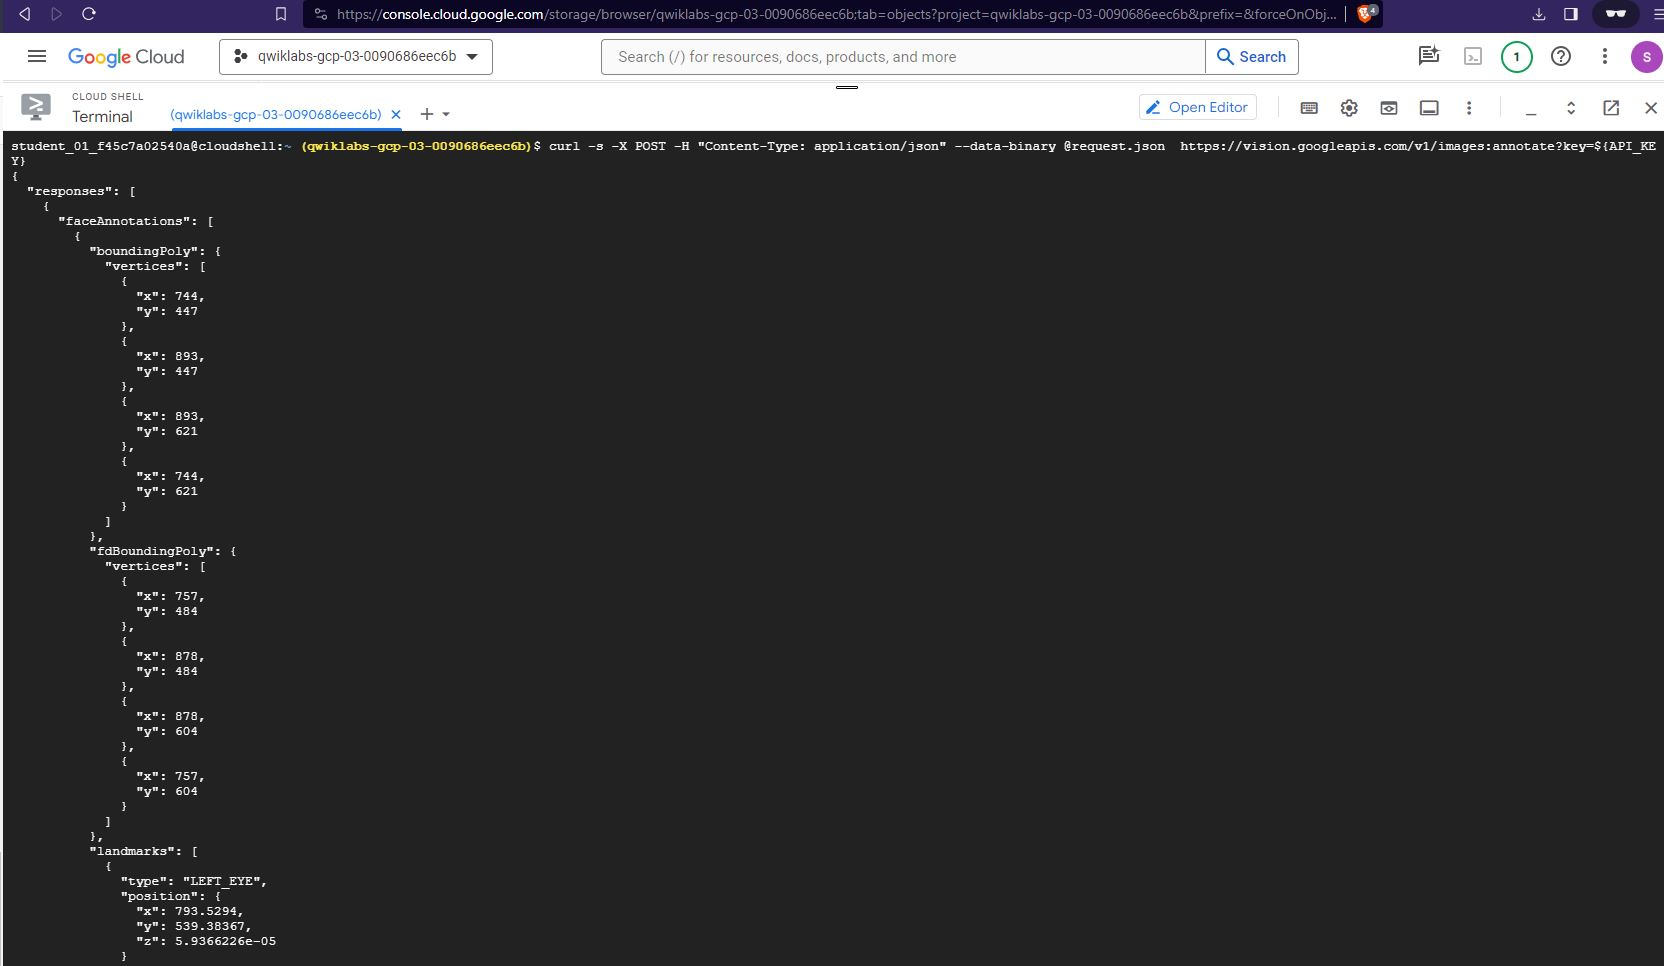

- `boundingPoly` gives you the x,y coordinates around the face in the image.
- `fdBoundingPoly` is a smaller box than boundingPoly, focusing on the skin part of the face.
- `landmarks` is an array of objects for each facial feature, some you may not have even known about. This tells us the type of landmark, along with the 3D position of that feature (x,y,z coordinates) where the z coordinate is the depth. The remaining values gives you more details on the face, including the likelihood of joy, sorrow, anger, and surprise.

The response you're reading is for the person standing furthest back in the image - you can see he's making kind of a silly face which explains the joyLikelihood of LIKELY.

### Task 8. Landmark Annotation

Landmark detection can identify common (and obscure) landmarks. It returns the name of the landmark, its latitude and longitude coordinates, and the location of where the landmark was identified in an image.

#### Upload a new image

To use this method, you upload a new image with faces to the Cloud Storage bucket.

1. Open the following image, https://cdn.qwiklabs.com/%2Fv47QS0KOC28%2F03bZx0R%2FO0iLLvtYQUOZyvnjIfz%2BIE%3D right click then click Save image as and save it to your computer as city.png.

2. Now upload it to your Cloud Storage bucket the same way you did before, and make it public.

#### Update request file

1. Next, update your request.json file with the following, which includes the URL of the new image, and uses landmark detection. Be sure to replace my-bucket-name with the name of your Cloud Storage bucket:

In [ ]:
{
  "requests": [
      {
        "image": {
          "source": {
              "gcsImageUri": "gs://my-bucket-name/city.png"
          }
        },
        "features": [
          {
            "type": "LANDMARK_DETECTION",
            "maxResults": 10
          }
        ]
      }
  ]
}

2. Save the file.

### Task 9. Call the Vision API and parse the response

Now you're ready to call the Vision API using the same curl command you used above:

In [ ]:
curl -s -X POST -H "Content-Type: application/json" --data-binary @request.json  https://vision.googleapis.com/v1/images:annotate?key=${API_KEY}

Next, look at the landmarkAnnotations part of the response:

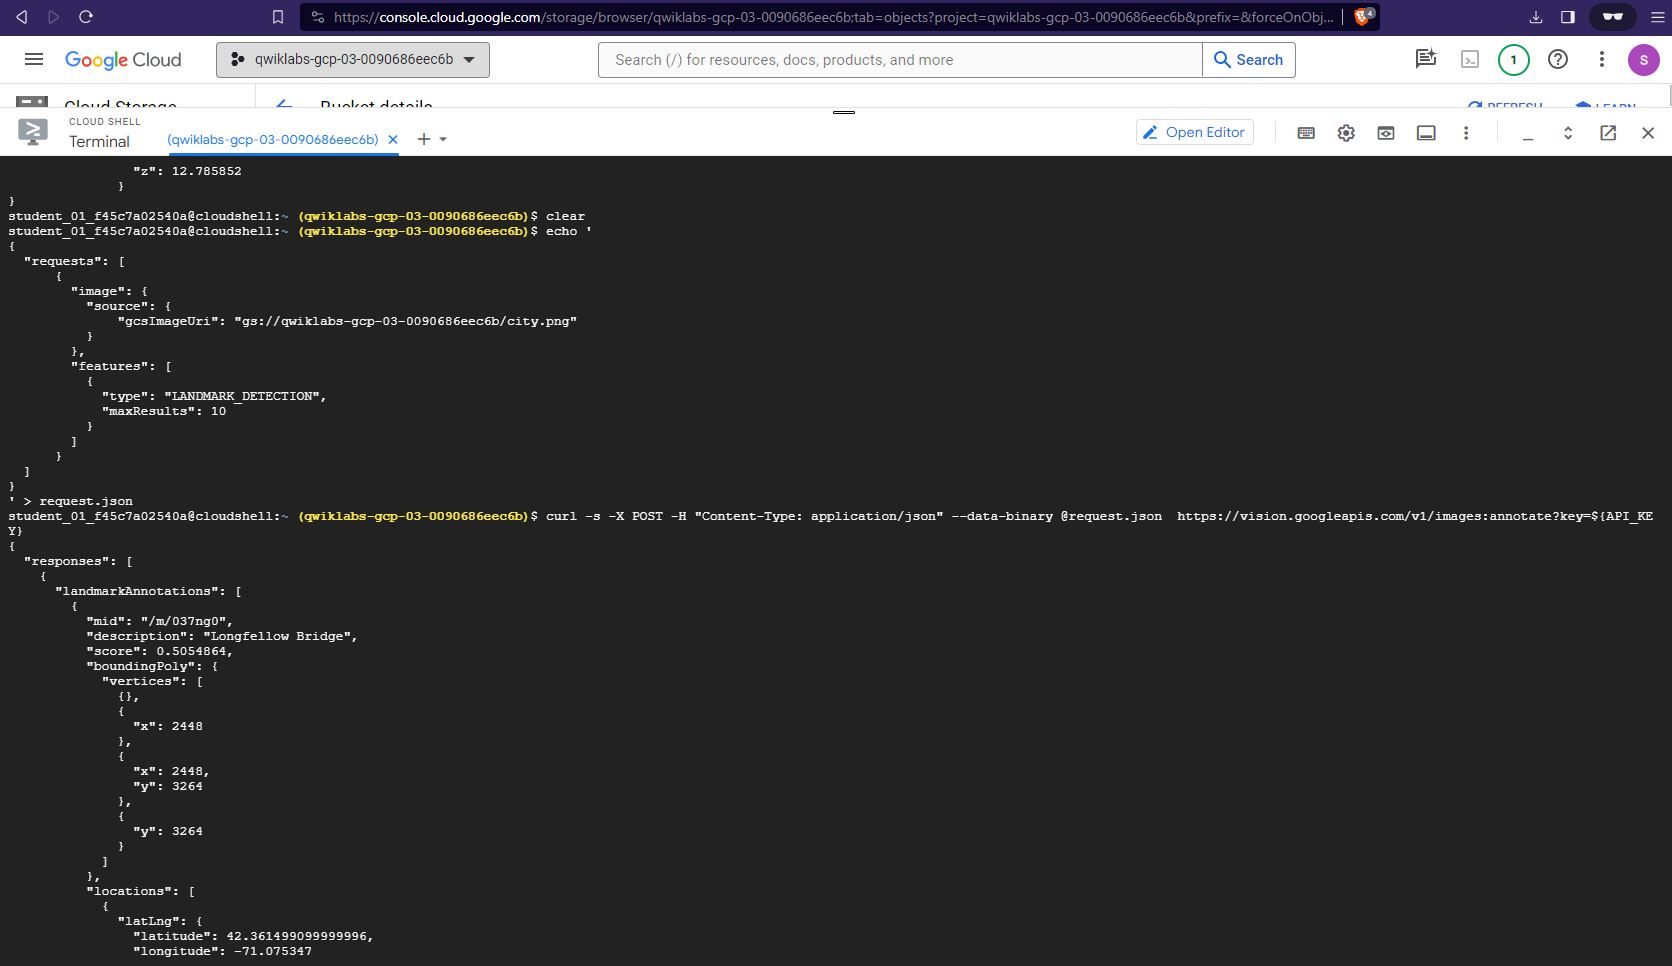


Here, the Vision API was able to tell that this picture was taken in Boston, and gives you a map of the exact location. The values in this response should look similar to the labelAnnotations response above:

- the `mid` of the landmark

- it's name (`description`)

- a confidence `score`

The boundingPoly shows the region in the image where the landmark was identified. The locations key tells us the latitude longitude coordinates of the picture.

### Task 10. Explore other Vision API methods

You've looked at the Vision API's label, face, and landmark detection methods, but there are three others you haven't explored. Dive into [the docs](https://cloud.google.com/vision/reference/rest/v1/images/annotate#Feature) to learn about the other three:

`Logo detection`: identify common logos and their location in an image.




`Safe search detection`: determine whether or not an image contains explicit content. This is useful for any application with user-generated content. You can filter images based on four factors: adult, medical, violent, and spoof content.

`Text detection`: run OCR to extract text from images. This method can even identify the language of text present in an image.

### Key takeaways

We learned how to analyze images with the Vision API. In this example we passed the API the Cloud Storage URL of our image. Alternatively, you can pass a base64 encoded string of your image.